In [3]:
from quant_met import hamiltonians, utils
import numpy as np
import matplotlib.pyplot as plt

In [9]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)
graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=0, coulomb_gr=1)
egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, mu=0, a=lattice_constant, V=1, U_gr=1, U_x=1)

In [11]:
nk_max = 120
k_point_range = np.array(range(2, nk_max + 1))

free_energy = np.zeros(k_point_range.shape)

for index, n_k_points in enumerate(k_point_range):
    BZ_grid = utils.generate_uniform_grid(n_k_points, n_k_points, all_K_points[1], all_K_points[5], origin=np.array([0, 0]))
    free_energy[index] = hamiltonians.free_energy(
        #delta_vector=np.array([2, 2]),
        delta_vector=np.array([2, 2, 2]),
        #hamiltonian=graphene_h,
        hamiltonian=egx_h,
        k_points=BZ_grid
    )

Text(0, 0.5, 'free energy')

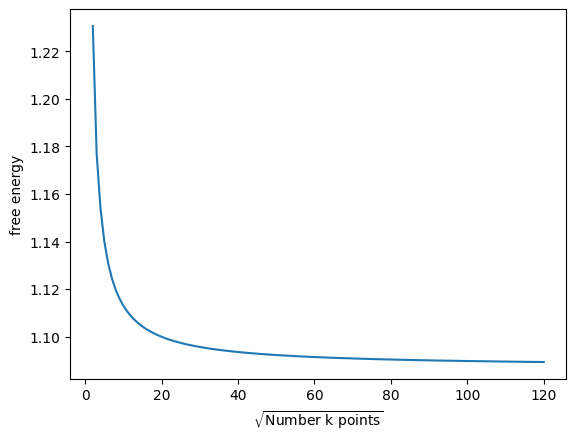

In [8]:
plt.plot(k_point_range, free_energy)
plt.xlabel("$\\sqrt{\\text{Number k points}}$")
plt.ylabel("free energy")

In [36]:
nk_max = 60
k_point_range = np.array(range(2, nk_max + 1))

free_energy = np.zeros(k_point_range.shape)

egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=1, a=lattice_constant, mu=0, U_gr=1, U_x=1)

for index, n_k_points in enumerate(k_point_range):
    BZ_grid = utils.generate_uniform_grid(n_k_points, n_k_points, all_K_points[1], all_K_points[5], origin=np.array([0, 0]))
    free_energy[index] = egx_h.free_energy(
        diagonalize_bdg=egx_h.diagonalize_bdg,
        coloumb_orbital_basis=egx_h.coloumb_orbital_basis,
        nonint_hamiltonian_k_space=egx_h.hamiltonian_k_space(BZ_grid),
        delta_vector=np.array([2, 2, 2]),
        k_points=BZ_grid
    )

Text(0, 0.5, 'free energy')

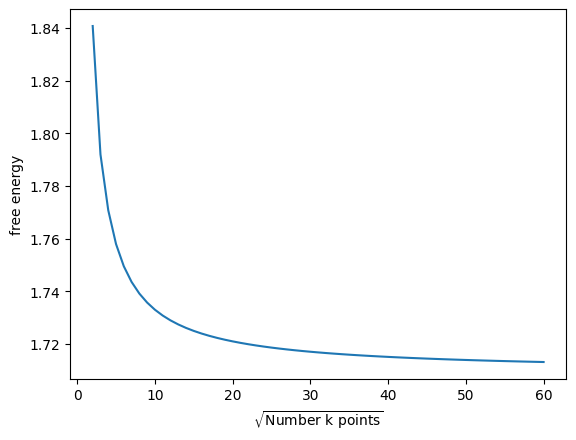

In [37]:
plt.plot(k_point_range, free_energy)
plt.xlabel("$\\sqrt{\\text{Number k points}}$")
plt.ylabel("free energy")